Train Model Using Data Set

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'Datasets\Final_Dataset(MC).xlsx'
df = pd.read_excel(file_path)

# Assuming 'Label' is the column indicating whether it's a in or not
X = df.drop(['Label'], axis=1)  # Features
y = df['Label']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=255)


##############################################K-Nearest Neighbors (KNN)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy K-Nearest Neighbors: {accuracy_knn:.2%}")

# Display classification report
print("Classification Report: K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))

########################################################XGBoost (Extreme Gradient Boosting)

# Initialize the XGBoost classifier with regularization parameters
xgb = XGBClassifier(eval_metric='logloss', reg_alpha=0.1, reg_lambda=0.1)

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Make predictions on the test set using XGBoost
y_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy XGBoost: {accuracy_xgb:.2%}")

# Display classification report
print("Classification Report: XGBoost")
print(classification_report(y_test, y_pred_xgb))

#########################################################Random Forest 

# Initialize the Random Forest classifier with reduced depth and regularization
random_forest = RandomForestClassifier(max_depth=5, min_samples_split=5)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions on the test set using Random Forest
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {accuracy_rf:.2%}")

# Display classification report
print("Classification Report: Random Forest")
print(classification_report(y_test, y_pred_rf))

######################################################LightGBM (Light Gradient Boosting Machine)

# Initialize the LightGBM classifier with reduced depth and regularization
lgbm = LGBMClassifier(max_depth=5, reg_alpha=0.1, reg_lambda=0.1)

# Train the LightGBM model
lgbm.fit(X_train, y_train)

# Make predictions on the test set using LightGBM
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate the LightGBM model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy LightGBM: {accuracy_lgbm:.2%}")

# Display classification report
print("Classification Report: LightGBM")
print(classification_report(y_test, y_pred_lgbm))

Accuracy K-Nearest Neighbors: 99.78%
Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       211

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

Accuracy XGBoost: 99.78%
Classification Report: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       211

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

Accuracy Random Forest: 100.00%
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.0

In [42]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'Datasets\Final_Dataset(MC).xlsx'
df = pd.read_excel(file_path)

# Assuming 'Label' is the column indicating whether it's a in or not
X = df.drop(['Label'], axis=1)  # Features
y = df['Label']  # Labels

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Perform cross-validation for each classifier
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)
    print(f"{clf_name}:")
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print()

KNN:
Cross-Validation Scores: [0.99780702 1.         1.         1.         0.93846154]
Mean Accuracy: 0.9872537112010796

Random Forest:
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0

XGBoost:
Cross-Validation Scores: [1.         1.         0.98681319 1.         1.        ]
Mean Accuracy: 0.9973626373626374



Test Model with Data Set (Test accuracy for Ml algorythoms and Pick best One)

In [43]:


# Load the new dataset with unlabeled data
file_path_new = 'Datasets\Final_Dataset(MC).xlsx'
df_new = pd.read_excel(file_path_new)

# Assuming 'Label' is the column indicating whether it's a video or not in the original labeled dataset
X_new = df_new.drop(['Label'], axis=1)   # Features


####################################################K-Nearest Neighbors

# Use the trained KNN model to predict labels for the new dataset
y_pred_new_knn = knn.predict(X_new)

# Check unique values in predicted labels
unique_labels_knn = pd.Series(y_pred_new_knn).unique()
print("Unique Predicted Labels: K-Nearest Neighbors", unique_labels_knn)

accuracy_knn = accuracy_score(df_new['Label'], y_pred_new_knn)
print(f"Accuracy:K-Nearest Neighbors {accuracy_knn:.2%}")

# Display classification report
print("Classification Report: K-Nearest Neighbors")
print(classification_report(df_new['Label'] ,y_pred_new_knn))



##########################################XGBoost (Extreme Gradient Boosting)

# Use the trained XGBoost model to predict labels for the new dataset
y_pred_new_xgb = xgb.predict(X_new)

# Check unique values in predicted labels
unique_labels_xgb = pd.Series(y_pred_new_xgb).unique()
print("Unique Predicted Labels:XGBoost", unique_labels_xgb)

accuracy_xgb = accuracy_score(df_new['Label'], y_pred_new_xgb)
print(f"Accuracy:XGBoost {accuracy_xgb:.2%}")

# Display classification report
print("Classification Report: XGBoost")
print(classification_report(df_new['Label'], y_pred_new_xgb))


##############################################Random Forest 

# Use the trained RF model to predict labels for the new dataset
y_pred_new_rf = random_forest.predict(X_new)

# Check unique values in predicted labels
unique_labels_rf = pd.Series(y_pred_new_rf).unique()
print("Unique Predicted Labels:Random Forest ", unique_labels_rf)

accuracy_rf = accuracy_score(df_new['Label'], y_pred_new_rf)
print(f"Accuracy:Random Forest  {accuracy_rf:.2%}")

# Display classification report
print("Classification Report: Random Forest ")
print(classification_report(df_new['Label'], y_pred_new_rf))


###############################################LightGBM (Light Gradient Boosting Machine)
# Use the trained LGBM model to predict labels for the new dataset
y_pred_new_lgbm = lgbm.predict(X_new)

# Check unique values in predicted labels
unique_labels_lgbm = pd.Series(y_pred_new_lgbm).unique()
print("Unique Predicted Labels:LightGBM", unique_labels_lgbm)

accuracy_lgbm = accuracy_score(df_new['Label'], y_pred_new_lgbm)
print(f"Accuracy:LightGBM {accuracy_lgbm:.2%}")

# Display classification report
print("Classification Report: LightGBM")
print(classification_report(df_new['Label'], y_pred_new_lgbm))


Unique Predicted Labels: K-Nearest Neighbors [1 0]
Accuracy:K-Nearest Neighbors 99.96%
Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1138
           1       1.00      1.00      1.00      1138

    accuracy                           1.00      2276
   macro avg       1.00      1.00      1.00      2276
weighted avg       1.00      1.00      1.00      2276

Unique Predicted Labels:XGBoost [1 0]
Accuracy:XGBoost 99.96%
Classification Report: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1138
           1       1.00      1.00      1.00      1138

    accuracy                           1.00      2276
   macro avg       1.00      1.00      1.00      2276
weighted avg       1.00      1.00      1.00      2276

Unique Predicted Labels:Random Forest  [1 0]
Accuracy:Random Forest  100.00%
Classification Report: Random Forest 
        

Save  Model

In [39]:
import pickle

# Save the trained model to a file
model_filename = 'Model/mountain_climbing_model.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(random_forest, model_file)

print(f"Model saved as {model_filename}")

Model saved as Model/mountain_climbing_model.pkl


Confusion Matrix

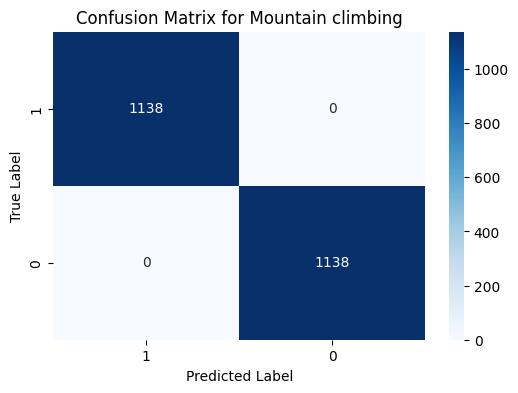

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



#######################################################################confusion matrix

# Generate confusion matrix for LightGBM
conf_matrix_rf = confusion_matrix(df_new['Label'], y_pred_new_rf)

# Visualize the confusion matrix 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels_rf, yticklabels=unique_labels_rf)
plt.title('Confusion Matrix for Mountain climbing')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()